In [1]:
using JLD, PyPlot

In [3]:
archivo="../JLDFiles/TrabajandoKyKTilde/LFP_Promedio_310816_stim_antidromic5.jld"

"../JLDFiles/TrabajandoKyKTilde/LFP_Promedio_310816_stim_antidromic5.jld"

In [4]:
Arxivo=load(archivo)

Dict{String,Any} with 10 entries:
  "Canalesrespuesta" => Set(Array{Int64,1}[[20, 23], [25, 20], [29, 34], [36, 4…
  "KTilde"           => [28.1263 33.76 … 1.19496 0.892065; 27.0489 36.982 … 1.2…
  "freq"             => 17.8555
  "latencia"         => 27
  "retrazo"          => 90
  "Nota"             => "Usamos las siguientes B y BT para obtener las Ks: Bcer…
  "K"                => [7485.96 3872.19 … 1610.86 1579.91; 3872.19 8060.53 … 1…
  "LFPSaturados"     => [4125.0 -12.085 … -4.69971 8.05664; 4.02832 -7.38525 … …
  "final"            => 1072
  "CanalesSaturados" => Set(Array{Int64,1}[[51, 30], [17, 60], [57, 37], [52, 1…

In [5]:
LFP=Arxivo["LFPSaturados"];

In [23]:
(alto,ancho,tmax)=size(LFP)
retrazo=Arxivo["retrazo"]

90

In [7]:
freq=Arxivo["freq"]
#retrazo=Arxivo["retrazo"]

17.85550205219098

In [14]:
extrema(LFP)

(-4122.98583984375, 4125.0)

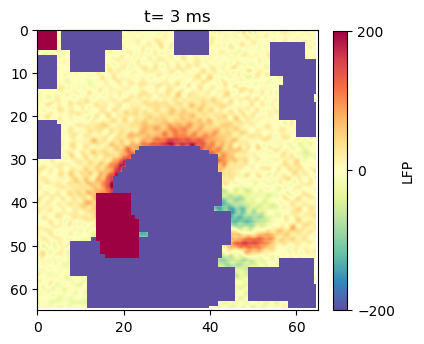

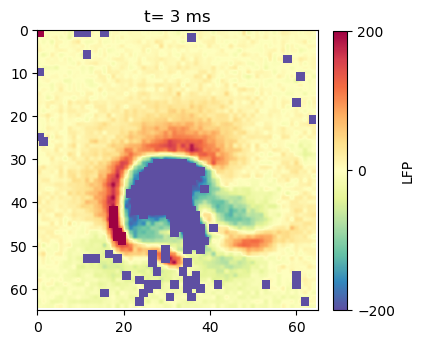

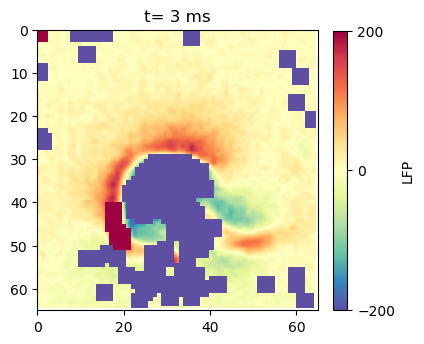

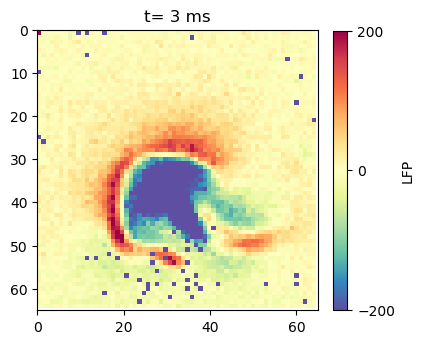

In [76]:
t=150

#ion()
ioff()
lista=("sinc", "hanning", "gaussian", "nearest")
limites=200
 ejemplo=LFP[:,:,t]
for interpol in lista
figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

   
    tiempo=round(Int,(t-retrazo)/freq)

tick_params(
    axis="both",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
   # bottom="off",      # ticks along the bottom edge are off
    top="off",
    right="off",
   # left="off",
# ticks along the top edge are off
   # labelbottom="off",
    labelleft="on")

    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation=interpol,
    cmap="Spectral_r", 
                      vmin=-limites,vmax=limites, extent=[0,64.5,0.5,64.5])

    cbx=colorbar(imagen, fraction=0.045, ticks=[-limites,0,limites]) 

cbx[:set_label]("LFP")
end

In [26]:
K=Arxivo["K"]
KTilde=Arxivo["KTilde"];

### Estabilización de K

In [84]:
longus=size(K,1)
lmax=10
KTT=zeros(longus,longus,lmax)
for l in 1:lmax
    λ=0.2*l/lmax
    for j in 1:longus
        K[j,j]=K[j,j]/2.0*(1+λ)
    end
    KTT[:,:,l]=transpose(KTilde)*inv(K)
end

In [85]:
saturados=Arxivo["CanalesSaturados"]

Set(Array{Int64,1}[[51, 30], [17, 60], [57, 37], [52, 17], [59, 26], [7, 58], [46, 41], [57, 60], [56, 28], [62, 36]  …  [56, 34], [59, 42], [59, 60], [58, 24], [53, 30], [1, 12], [60, 26], [46, 36], [59, 32], [50, 37]])

In [86]:
todaslasX=Array[]

ncuad=64
Ntot=ncuad^2

for j=1:ncuad,k=1:ncuad
    push!(todaslasX,[j,k])
end

xpurgadas=filter(q->!(q in saturados), todaslasX)
nbuenas=length(xpurgadas)

lfpv=zeros(nbuenas)

println("Acomodando los LFP correctos")

println("nbuenas", nbuenas)

for j=1:nbuenas
    
    renglon=xpurgadas[j][1]
    columna=xpurgadas[j][2]
    lfpv[j]=ejemplo[renglon,columna]
end


Acomodando los LFP correctos
nbuenas4038


0.0

In [89]:
CSD=zeros(64,64,lmax)

for l in 1:lmax
    CSDTentativa=KTT[:,:,l]*lfpv 

    for j=1:nbuenas
        renglon=xpurgadas[j][1]
        columna=xpurgadas[j][2]
        CSD[renglon,columna,l]=CSDTentativa[j]
    end
end
println("terminando calculo")
#writedlm("EjemplitokCSD.dat",CSD)

terminando calculo


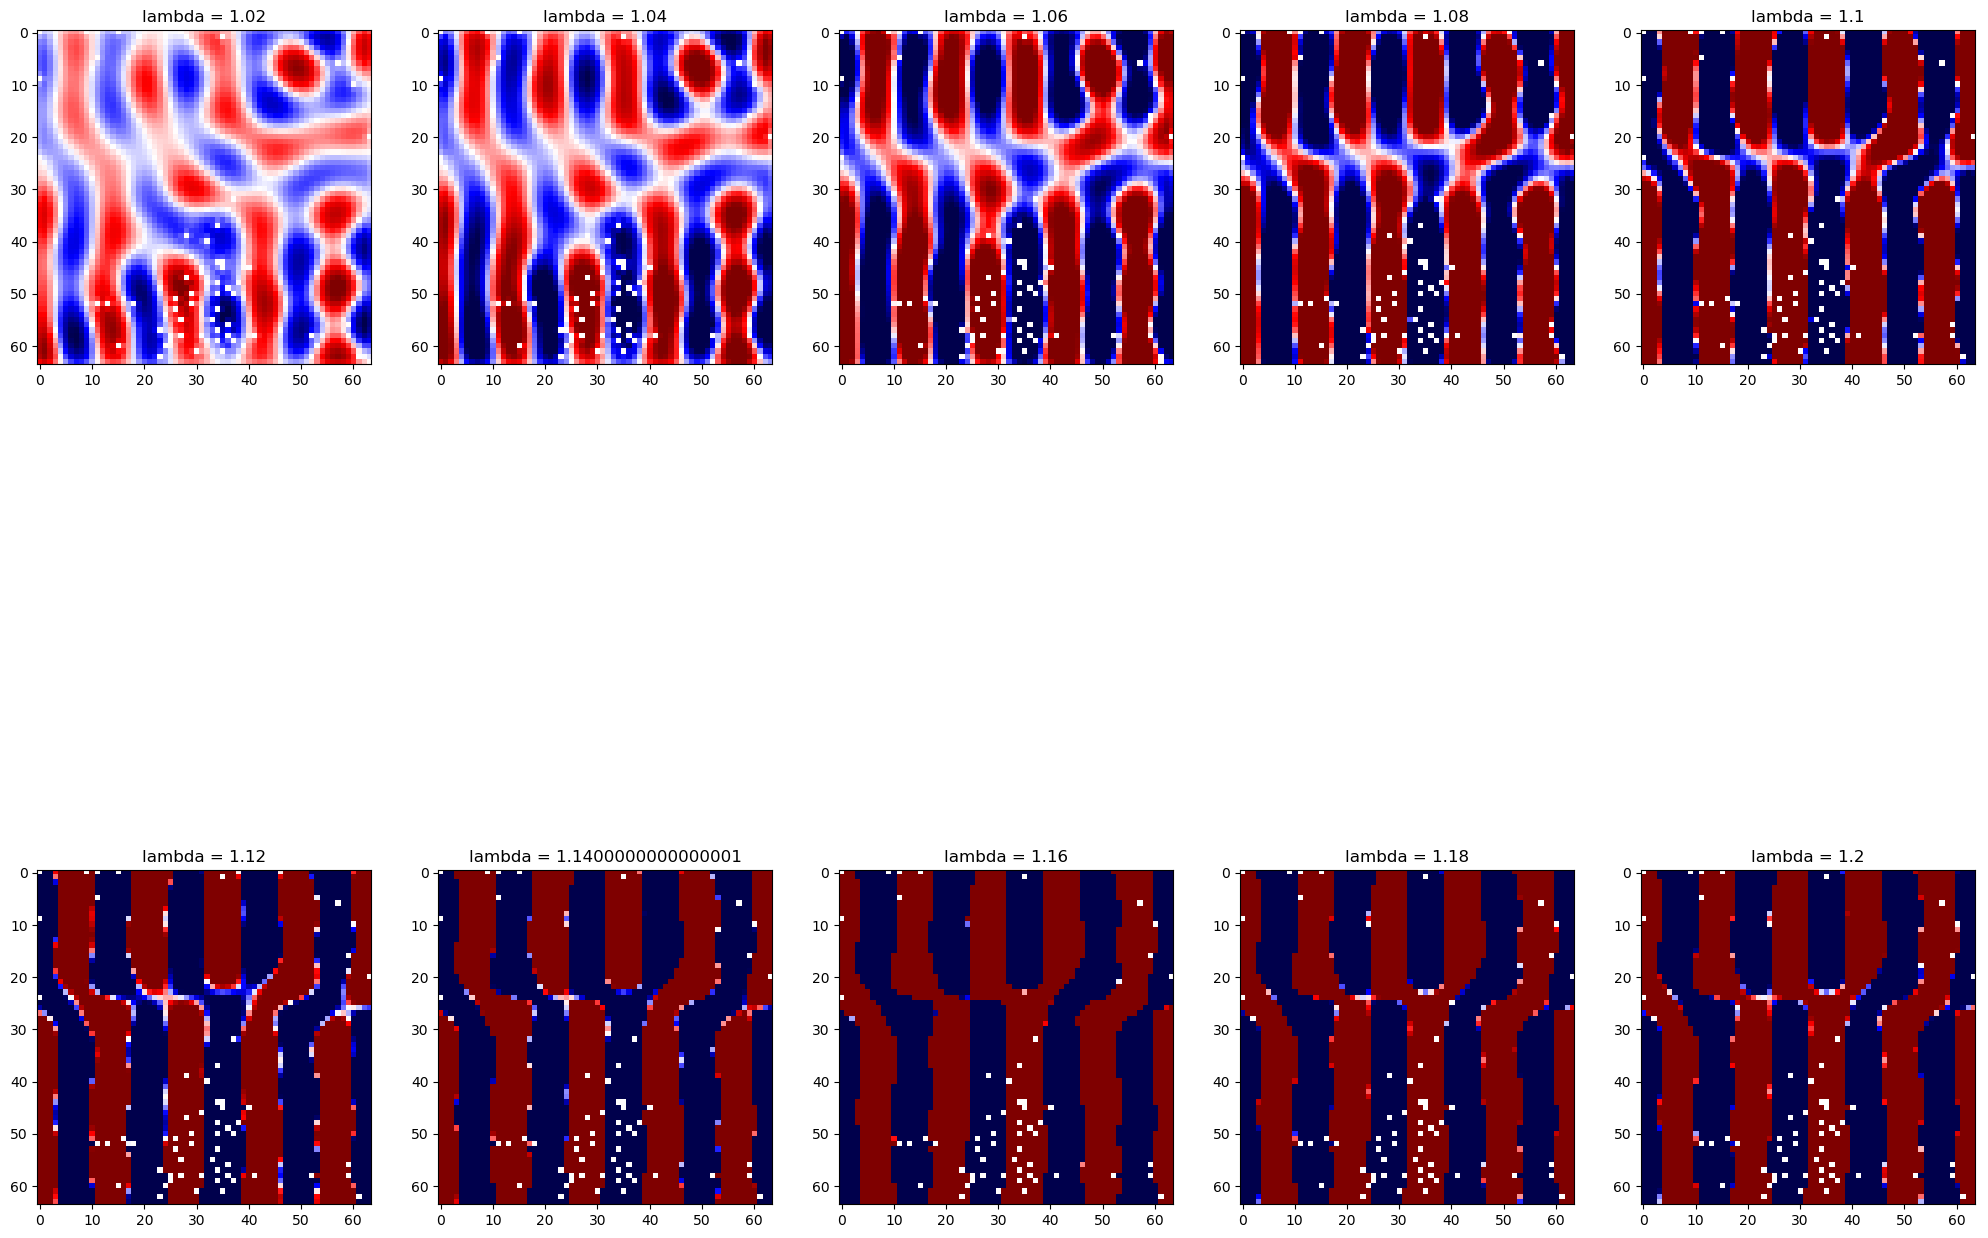

In [91]:
farofa, lista=subplots(2,5, figsize=(25,20))
vlim=40
intervalo=0.2
for l=1:lmax
    pu=ceil(Int,l/5)
    pa=mod(l,5)
    reallambda=(1+intervalo*l/lmax)
    if pa==0; pa=5;end
   # println(pa,", ",pu)
    lista[pu,pa][:imshow](CSD[:,:,l],cmap="seismic",vmin=-vlim,vmax=vlim)
    lista[pu,pa][:set_title]("lambda = $reallambda")
end
savefig("VarioskCSD03.png",dpi=92)